In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df = pd.read_csv('TWTR.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
...,...,...,...,...,...,...,...
2259,2022-10-28,NaN,NaN,NaN,NaN,NaN,NaN
2260,2022-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2261,2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2262,2022-11-02,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Data Exploration:

In [6]:
df.shape

(2264, 7)

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB


In [9]:
df.isna().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [10]:
df['Open'].fillna(df['Open'].mean(), inplace=True)

In [11]:
df.isna().sum()

Date         0
Open         0
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [12]:
df['High'].fillna(df['High'].mean(), inplace=True)
df['Low'].fillna(df['Low'].mean(), inplace=True)
df['Close'].fillna(df['Close'].mean(), inplace=True)
df['Adj Close'].fillna(df['Adj Close'].mean(), inplace=True)
df['Volume'].fillna(df['Volume'].mean(), inplace=True)

In [13]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2264.0,3.602029e+01,1.410286e+01,13.950,2.557500e+01,3.545000e+01,4.420000e+01,7.836000e+01
High,2264.0,3.669988e+01,1.435617e+01,14.220,2.624500e+01,3.613380e+01,4.500000e+01,8.075000e+01
Low,2264.0,3.533946e+01,1.381344e+01,13.725,2.492625e+01,3.485000e+01,4.331375e+01,7.605000e+01
Close,2264.0,3.600363e+01,1.407441e+01,14.010,2.549250e+01,3.553000e+01,4.408500e+01,7.763000e+01
Adj Close,2264.0,3.600363e+01,1.407441e+01,14.010,2.549250e+01,3.553000e+01,4.408500e+01,7.763000e+01
Volume,2264.0,2.175186e+07,1.907877e+07,0.000,1.235467e+07,1.697204e+07,2.424488e+07,2.692131e+08


In [15]:
df_2014 = df[df['Date'].str.startswith('2014')]

# Find the lowest and highest prices in 2014
lowest_price_2014 = df_2014['Low'].min()
highest_price_2014 = df_2014['High'].max()

# Print the lowest and highest prices in 2014
print("Lowest price in 2014: $", lowest_price_2014)
print("Highest price in 2014: $", highest_price_2014)

Lowest price in 2014: $ 29.51
Highest price in 2014: $ 70.43


In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
#Data Visualization

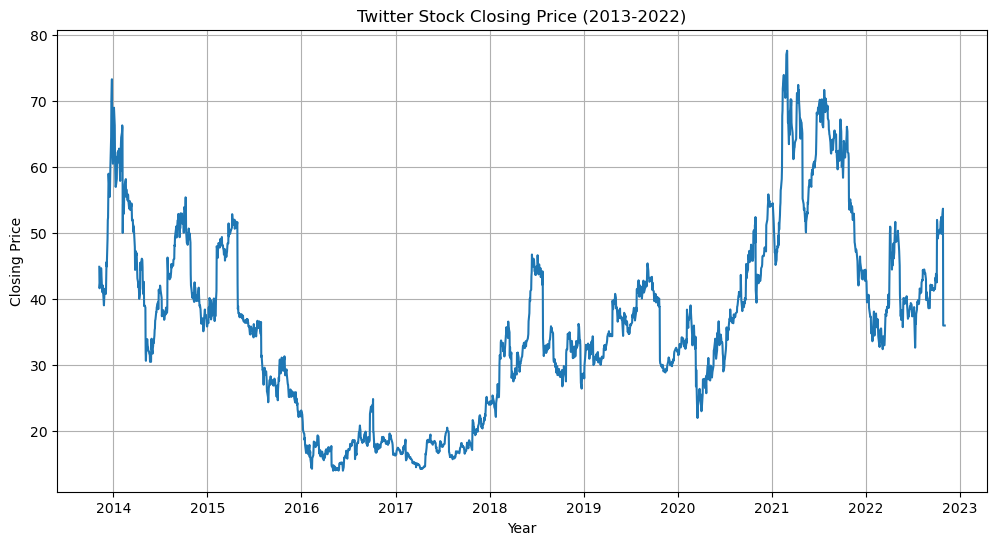

In [18]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Twitter Stock Closing Price (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

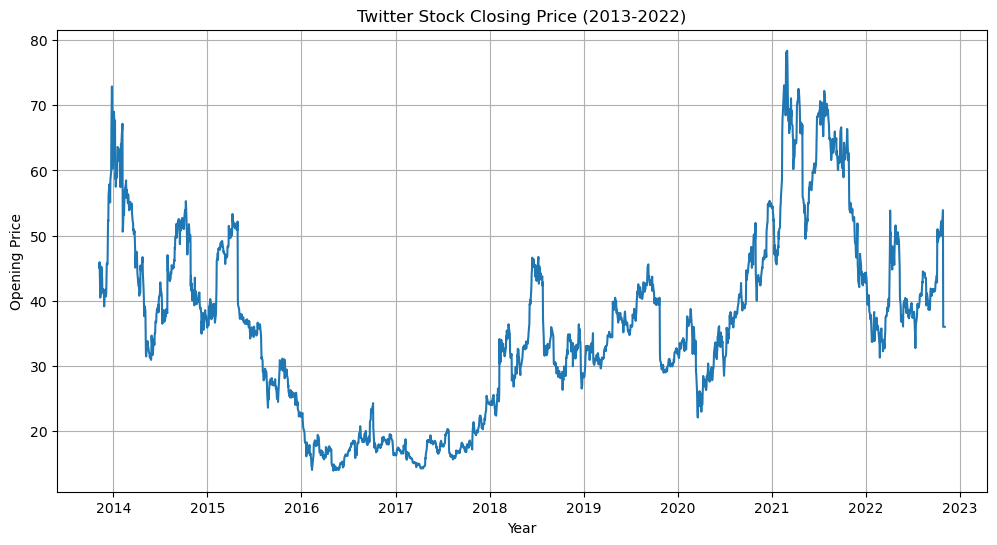

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'])
plt.title('Twitter Stock Closing Price (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Opening Price')
plt.grid(True)
plt.show()

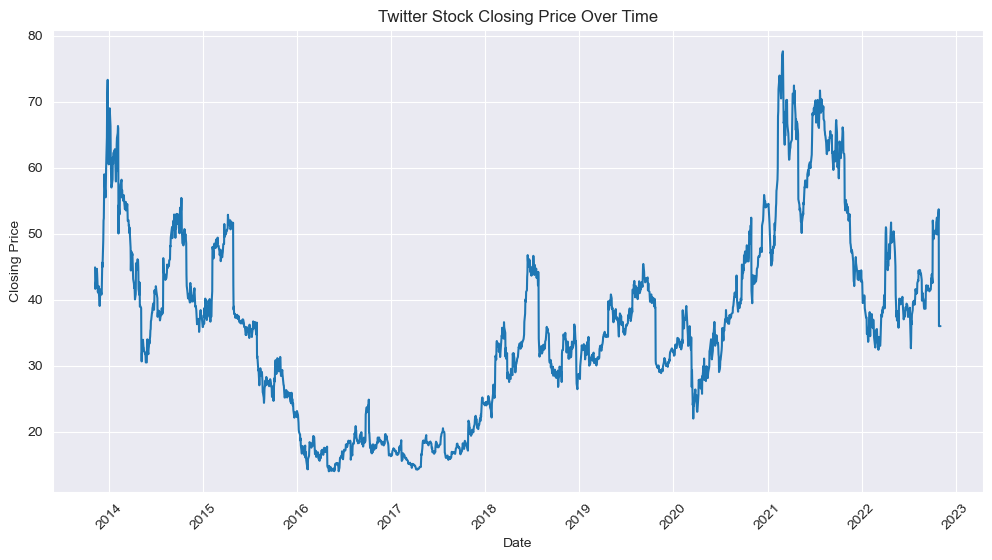

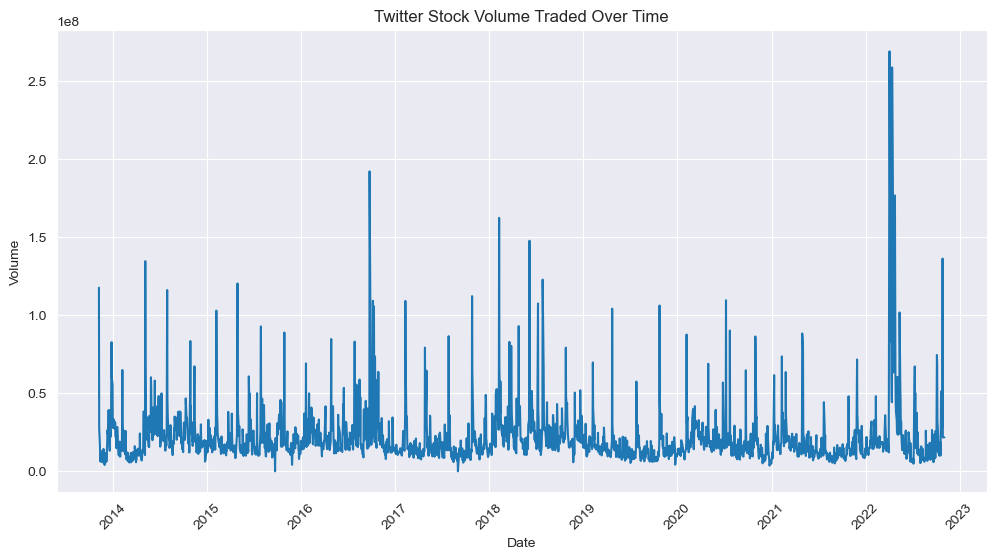

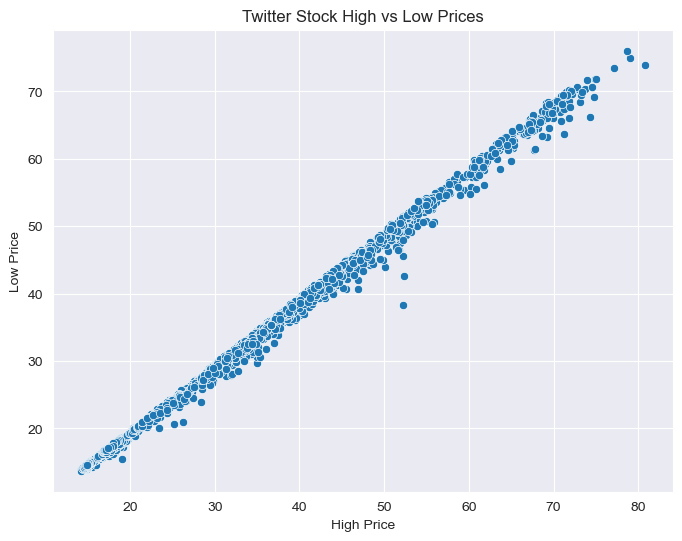

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.xticks(rotation=45)
plt.title('Twitter Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=df)
plt.xticks(rotation=45)
plt.title('Twitter Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='High', y='Low', data=df)
plt.title('Twitter Stock High vs Low Prices')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

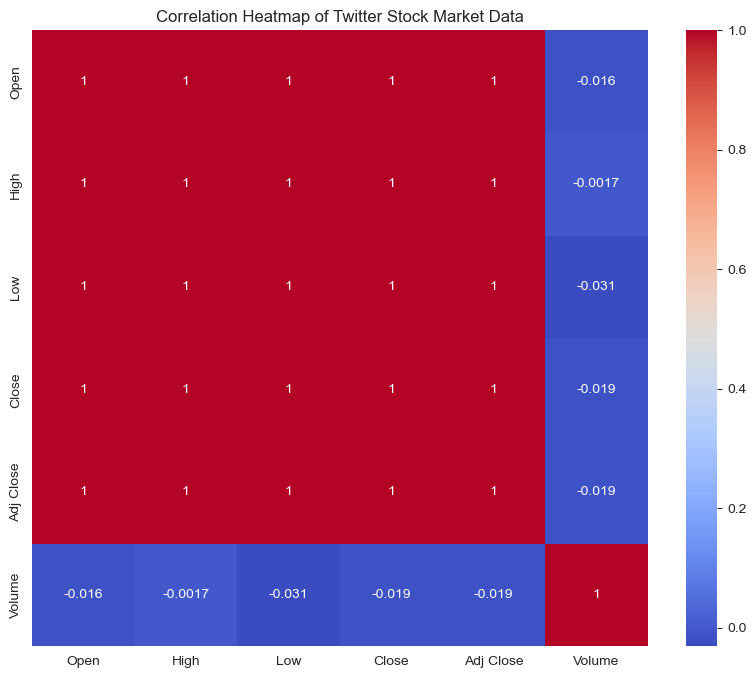

In [21]:
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Twitter Stock Market Data')
plt.show()

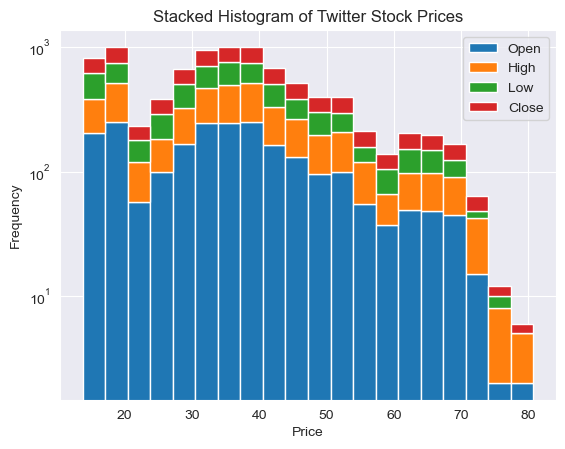

In [22]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.hist([df['Open'], df['High'], df['Low'], df['Close']], bins=20, stacked=True, label=['Open', 'High', 'Low', 'Close'])
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Stacked Histogram of Twitter Stock Prices')
ax.legend()
plt.show()

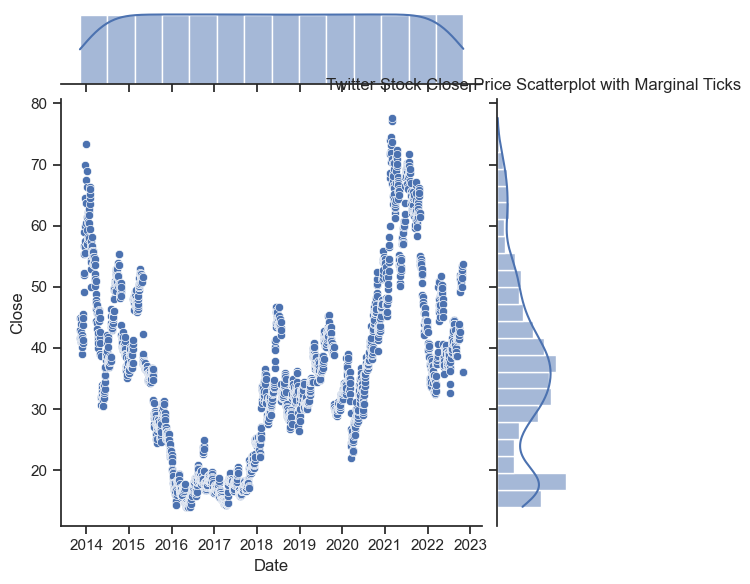

In [23]:
sns.set(style="ticks")
g = sns.JointGrid(data=df, x='Date', y='Close', height=6, ratio=5)
g.plot_joint(sns.scatterplot, color='b')
g.plot_marginals(sns.histplot, kde=True, color='b')
plt.xticks(rotation=45, ha='right')
plt.title('Twitter Stock Close Price Scatterplot with Marginal Ticks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()